<a href="https://colab.research.google.com/github/JijiDharshini/CodeAlpha_Unemployment-analysis-with-python/blob/main/Unemployment_Analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the unemployment zip
uploaded = files.upload()

# Extract the zip
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("unemployment_data")

# List extracted files
os.listdir("unemployment_data")

Saving archive.zip to archive.zip


['Unemployment in India.csv', 'Unemployment_Rate_upto_11_2020.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("unemployment_data/Unemployment_Rate_upto_11_2020.csv")  # Adjust file name if needed
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()
df.dropna(inplace=True)
df[' Date'] = pd.to_datetime(df[' Date'].str.strip(), format="%d-%m-%Y")
df['Month'] = df[' Date'].dt.month
df['Year'] = df[' Date'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


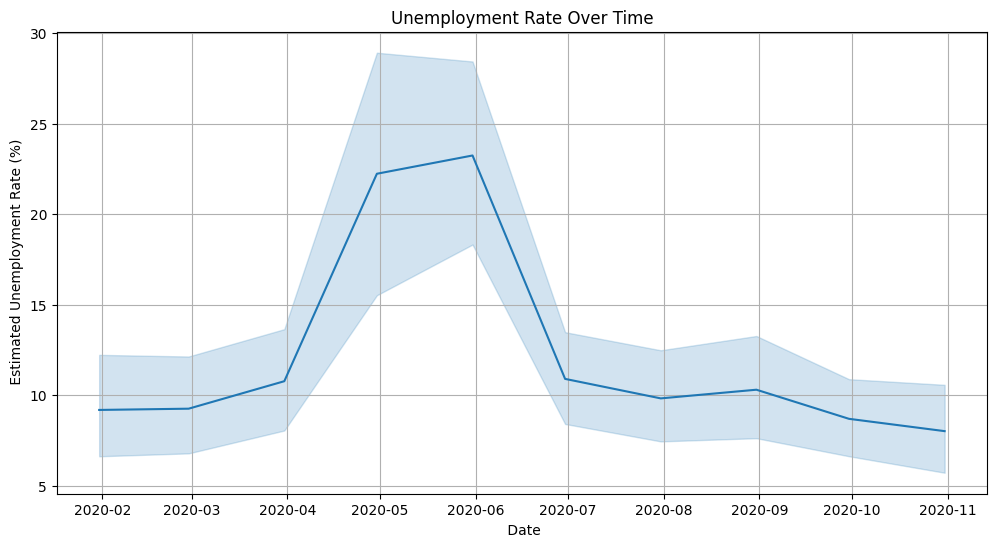

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Over Time")
plt.grid(True)
plt.savefig("images/unemployment_trend.png")  # Save before show
plt.show()

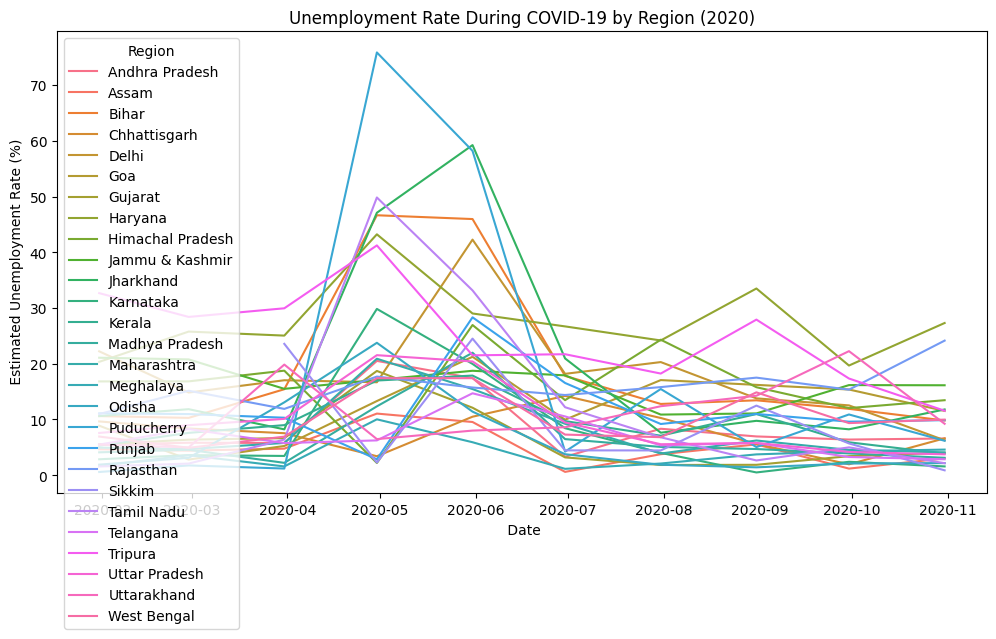

In [ ]:
covid_df = df[df['Year'] == 2020]

plt.figure(figsize=(12,6))
sns.lineplot(data=covid_df, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate During COVID-19 by Region (2020)")
plt.savefig("images/covid_impact_by_region.png")
plt.show()

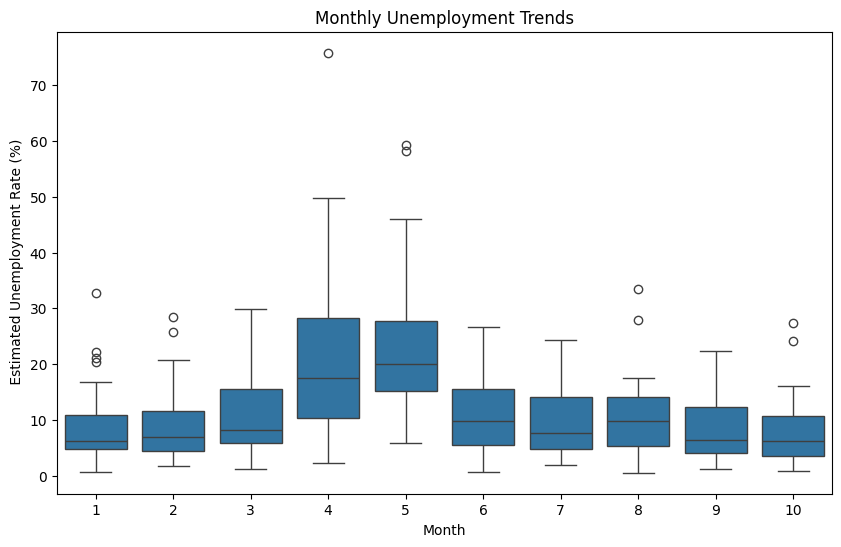

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Month', y=' Estimated Unemployment Rate (%)', data=df)
plt.title("Monthly Unemployment Trends")
plt.savefig("images/monthly_trend_boxplot.png")
plt.show()

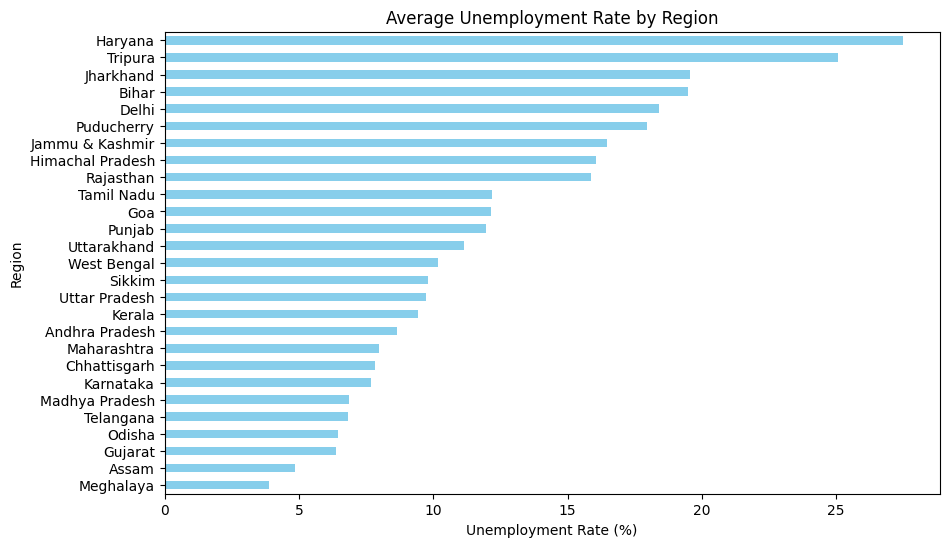

In [ ]:
region_mean = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
region_mean.plot(kind='barh', figsize=(10,6), color='skyblue', title='Average Unemployment Rate by Region')
plt.xlabel("Unemployment Rate (%)")
plt.savefig("images/regionwise_unemployment_bar.png")
plt.show()

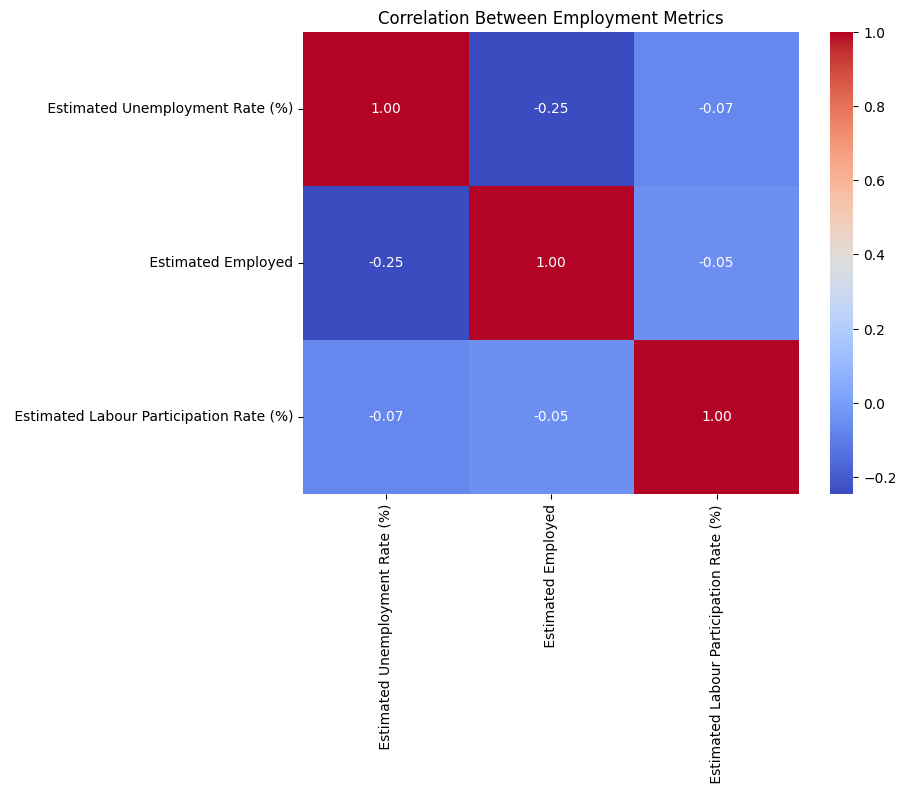

In [ ]:
# Compute correlation
corr = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Employment Metrics")
plt.savefig("images/unemployment_trend.png")  # Save before show
plt.show()

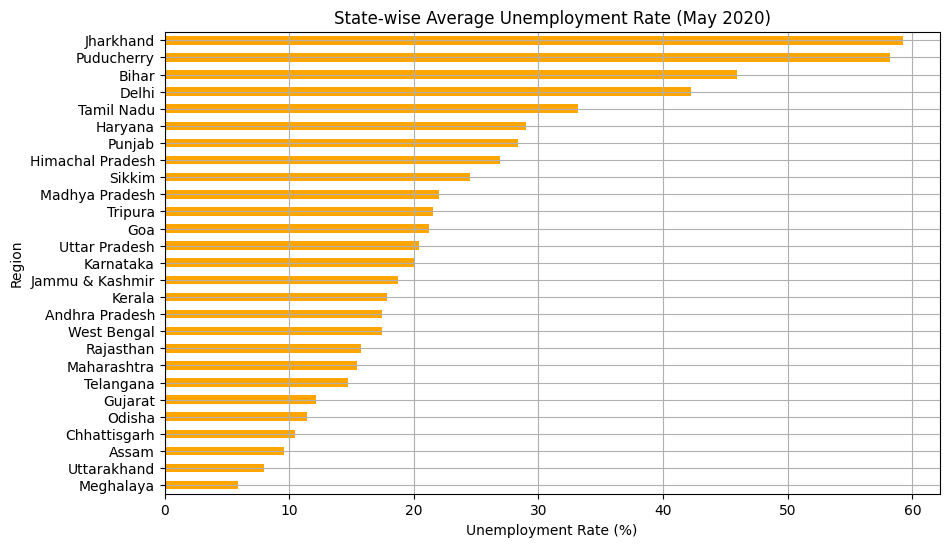

In [ ]:
# Example: State-wise unemployment for May 2020
may_df = df[(df['Month'] == 5) & (df['Year'] == 2020)]
statewise = may_df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(10, 6))
statewise.plot(kind='barh', color='orange')
plt.title("State-wise Average Unemployment Rate (May 2020)")
plt.xlabel("Unemployment Rate (%)")
plt.grid(True)
plt.savefig("images/unemployment_trend.png")  # Save before show
plt.show()

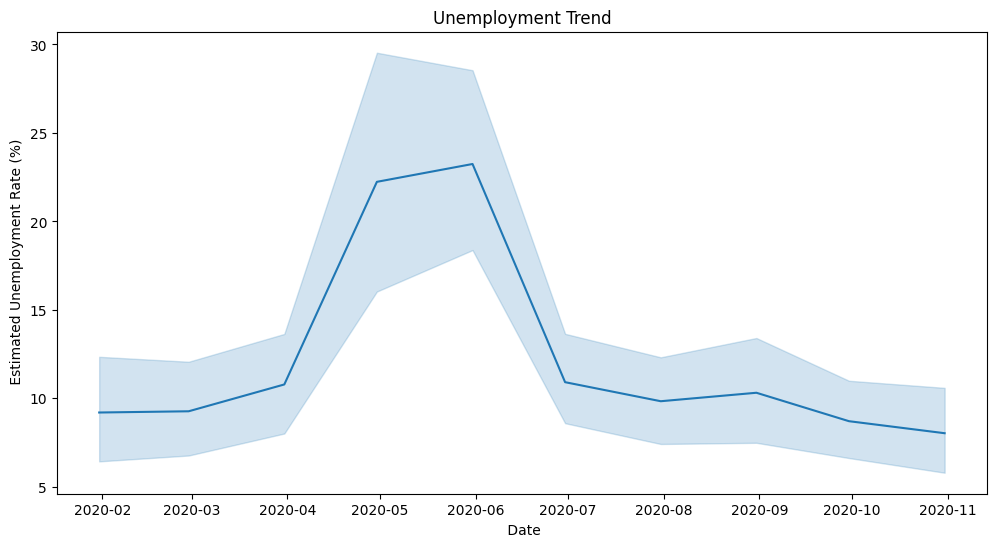

In [ ]:
import os

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.title("Unemployment Trend")

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

plt.savefig("images/unemployment_trend.png")